<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='green'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [ ]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW' -O 'HW4_data.zip'
!unzip HW4_data.zip

--2024-01-24 23:55:10--  https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW
Resolving drive.google.com (drive.google.com)... 209.85.234.101, 209.85.234.102, 209.85.234.138, ...
Connecting to drive.google.com (drive.google.com)|209.85.234.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW&export=download [following]
--2024-01-24 23:55:10--  https://drive.usercontent.google.com/download?id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.1.132, 2607:f8b0:4001:c24::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.1.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1706229 (1.6M) [application/octet-stream]
Saving to: ‘HW4_data.zip’

HW4_data.zip        100%[===================>]   1.63M  --.-KB/s    

# Imports
<div dir=rtl>
<font color="green" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [ ]:
###
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

###

# Any Helper Functions

<div dir=rtl>
<font color="green" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [ ]:
###
def helperImshow(
    img,
    title: str,
    cmap: str = 'gray',
    vmin: int = 0,
    vmax: str = 255
):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(title, color='white', fontweight='bold', backgroundcolor='green')

    plt.axis('off')
    plt.show()

def helperImgesShow(
    imgs: dict, # {title: img}
    cmap: str = 'gray',
    vmin: int = 0,
    vmax: int = 255
):
    plt.figure(figsize=(30,10))

    i = 0
    for title, img in imgs.items():
        i = i + 1
        plt.subplot(2,5,i)
        plt.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.title(title, color='white', backgroundcolor='green')
        plt.axis('off')
###

# Question 5: Edge Detection (15%)

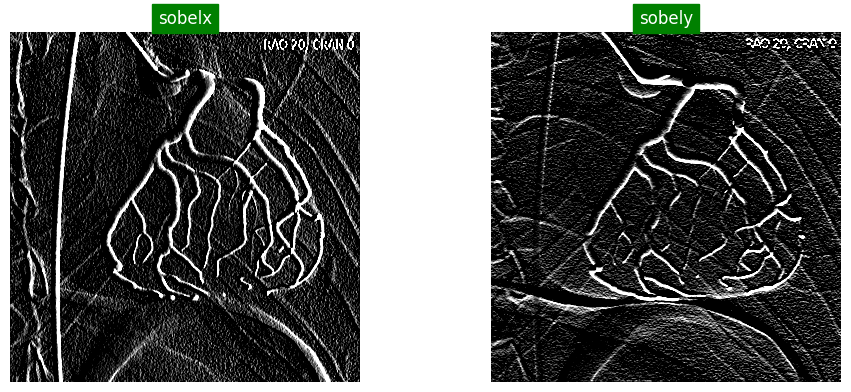

In [ ]:
#@title Q5 - Part 1 (Sobel) (5%)
###
angio = cv.imread("angio.png", cv.IMREAD_GRAYSCALE)
sobelx = cv.Sobel(angio,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(angio,cv.CV_64F,0,1,ksize=5)
helperImgesShow(
    {
        'sobelx': sobelx,
        'sobely': sobely
    }
)
###

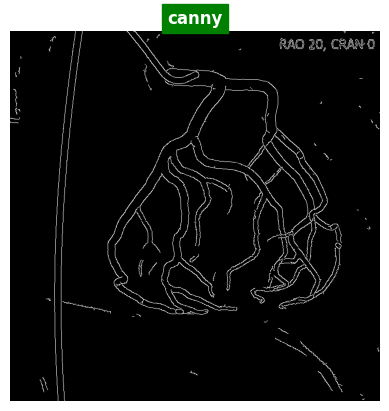

In [ ]:
#@title Q5 - Part 2 (Canny) (5%)
###
canny = cv.Canny(angio,35,70)
helperImshow(canny, 'canny')

###

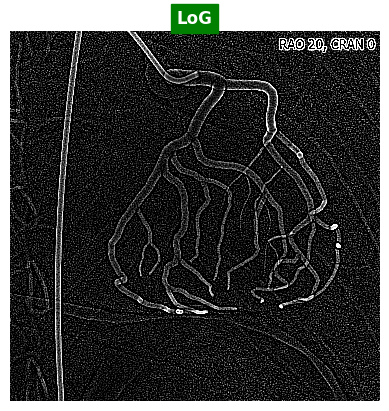

In [ ]:
#@title Q5 - Part 3 (LoG) (5%)
###
LoG = cv.Laplacian(angio, cv.CV_16S, ksize=5)
helperImshow(LoG, 'LoG')
###

# Question 6: Hough Transform (15%)

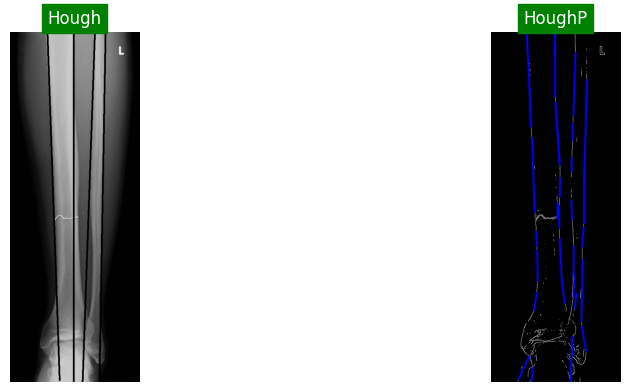

In [ ]:
#@title Q6 - Part 1 (60%)
###
bone = cv.imread("bone.jpg", cv.IMREAD_GRAYSCALE)
bone = cv.GaussianBlur(bone,(3,3),0)
bone_edge = cv.Canny(bone,60,60)

cdstP = cv.cvtColor(bone_edge, cv.COLOR_GRAY2BGR)
linesP = cv.HoughLinesP(bone_edge, 1, np.pi / 180, 50, None, 40, 20)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)



bone = cv.imread("bone.jpg", cv.IMREAD_GRAYSCALE)
blur = cv.GaussianBlur(bone,(3,3),0)
bone_edge = cv.Canny(bone,60,60)

lines = cv.HoughLines(bone_edge, 1.2, np.pi/180, 220)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(bone, (x1, y1), (x2, y2), (0,0,255), 4)

helperImgesShow({
    'Hough': bone,
    'HoughP': cdstP
})


###

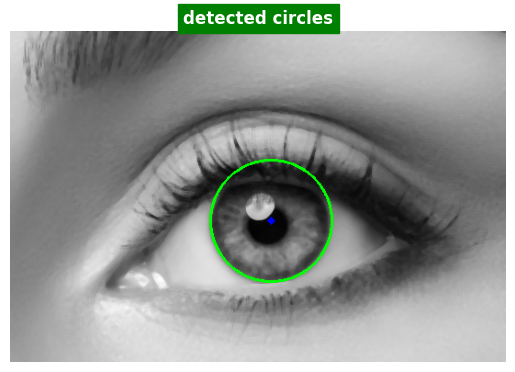

In [ ]:
#@title Q6 - Part 2 (40%)
###

eye = cv.imread("eye.jpg", cv.IMREAD_GRAYSCALE)


img = cv.medianBlur(eye,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,40,param1=200,param2=40,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
  cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)


helperImshow(cimg, 'detected circles')

###

# Question 7: Feature-Based Registration (20%)

In [ ]:
###
image = cv.imread('MRIF.png', cv.IMREAD_GRAYSCALE)
point1 = [89,119]
qpoint1 = [125,66]

point2 = [105,203]
qpoint2 = [104,108]

point3 = [157,199]
qpoint3 = [212,231]


A = np.array([[point1[0], point1[1], 1], [point2[0], point2[1], 1], [point3[0], point3[1], 1]])
b = np.array([[qpoint1[0], qpoint1[1]], [qpoint2[0], qpoint2[1]], [qpoint3[0], qpoint3[1]]])

result = np.matmul(np.linalg.inv(A),b)

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        print(f'a{i + 1}{j + 1} = {result[i][j]}')

###

a11 = 2.027978339350181
a12 = 2.3691335740072206
a21 = -0.6362815884476538
a22 = 0.04873646209386242
a31 = 20.227436823104654
a32 = -150.6525270758123


# Question 8: Similarity-based Segmentation (20%)

In [41]:
#@title Q8 - Part 1
###
mri = cv.imread('Color_MRI.png')
mri = cv.cvtColor(mri, cv.COLOR_BGR2RGB)
###

In [ ]:
#@title Q8 - Part 2
###
seed_white = (370, 400)
seed_gray = (247, 271)

###

In [42]:
#@title Q8 - Part 3 (5%)
###
empty_image = np.zeros(mri.shape, dtype=np.uint8)
empty_image[seed_white] = mri[seed_white]
empty_image[seed_gray] = mri[seed_gray]

###

In [45]:
#@title Q8 - Part 4 (50%)
###
def growing_region(image, d, type_t, seed, max_iterations=100):
    result = np.zeros_like(image, dtype=np.uint8)
    x = image[seed]
    result[seed] = x

    for _ in range(max_iterations):
        if type_t == 'const':
            threshold = x
        elif type_t == 'dynamic':
            threshold = np.mean(image[result == x])
            threshold = np.array([threshold,threshold,threshold])


        mask = cv.inRange(image, threshold - d, threshold + d)
        result = cv.bitwise_and(result, result, mask=~mask)
        result[mask > 0] = x

    return result

###

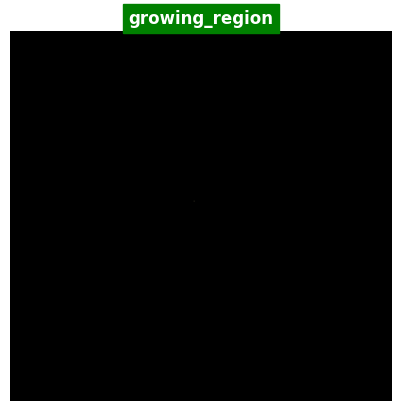

In [46]:
#@title Q8 - Part 5 (15%)
###
rg = growing_region(empty_image, 10, "const", seed_white, 208)
helperImshow(rg, 'growing_region')

###

In [49]:
#@title Q8 - Part 6 (10%)
###
image1 = cv.imread('Color_MRI.png')
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)

image2 = cv.imread('Color_MRI.png')
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

image3 = cv.imread('Color_MRI.png')
image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)

image4 = cv.imread('Color_MRI.png')
image4 = cv.cvtColor(image4, cv.COLOR_BGR2RGB)

const1 = growing_region(image1, 10, "const", seed_white, 208)
const2 = growing_region(image2, 10, "const", seed_gray, 208)

dynamic1 = growing_region(image3, 50, "dynamic", seed_white, 208)
dynamic2 = growing_region(image4, 50, "dynamic", seed_gray, 208)

###

In [48]:
#@title Q8 - Part 7 (5%)
###
print(208)
###

208


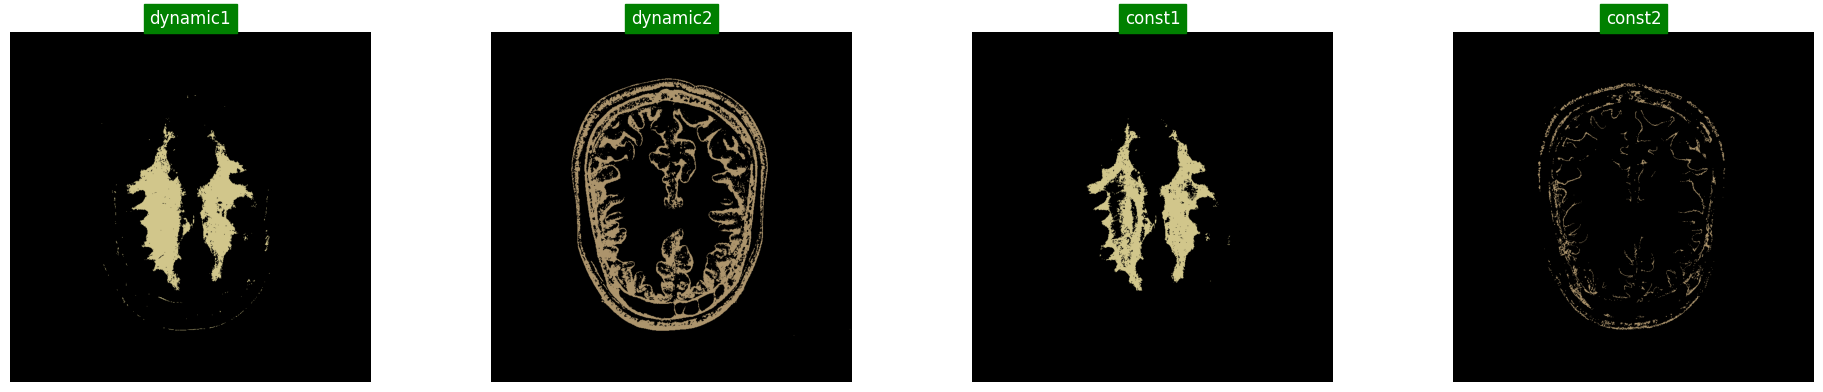

In [50]:
#@title Q8 - Part 8 (15%)
###
helperImgesShow({
    'dynamic1': dynamic1,
    'dynamic2': dynamic2,
    'const1': const1,
    'const2': const2
})

###